# Data Dictionary

|**Feature**|**Description**|
|:---------:|:-------------:|
|ID|Patient ID|
|Diabetes_binary|Diabetes status|
|HighBP|Blood pressure level|
|HighChol|Cholesterol level|
|CholCheck|Cholesterol check in 5 years status|
|BMI|Body Mass Index|
|Smoker|Smoke at least 100 cigarettes entire life status|
|Stroke|Stroke precedence status|
|HeartDiseaseorAttack| Coronary heart disease or myocardial infarction status|
|PhysActivity|Physical activity past 30 days not including job status|
|Fruits|Consume fruit 1 or more times per day|
|Veggies|Consume fruit 1 or more times per day|
|HvyAlcoholConsump|Heavy drinker status (M: >14/week, F: >7/week)|
|AnyHealthcare|Healthcare coverage|
|NoDocbcCost|Could not go to doctor past 12 months due to cost|
|GenHlth|General health level on scale 1-5 (1=excellent, 5=poor)|
|MentalHlth|No.days in past 30 days when mental health was not good|
|PhysHlth|No.days during past 30 days when physical health was not good|
|DiffWalk|Serious difficulty walking/climbing stairs status|
|Sex|Sex of patient (0=female, 1=male)|
|Age|Age category|
|Education|Education level|
|Income|Patient's income category|

In this problem, we want to diagnose whether or not a patient has diabetes based on their health history, demographics, and additional personal information.

In [471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import chi2_contingency
import math

pd.set_option("display.max.columns", None)

# Data Collection

+ Dataset has 70692 rows and 22 features
+ No missing values

In [141]:
df = pd.read_csv(r"C:/Users/X1 Carbon/Desktop/IntroAI_Assignment2/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [142]:
df.shape

(70692, 22)

In [143]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [144]:
df = df.astype(int)

# Data Pre-processing

### Binning PhysHlth and MentHlth

In [480]:
df["PhysHlth_Bin"] = df["PhysHlth"].apply(lambda x: math.ceil(x/7) if x != 0 else x)
df["MentHlth_Bin"] = df["MentHlth"].apply(lambda x: math.ceil(x/7) if x != 0 else x)

# Exploratory Data Analysis (EDA)

In [122]:
sns.set_theme()

## Univariate Analysis

In [349]:
def plot_frequency(col_name: str):
    if col_name not in df.columns: 
        raise Exception("Colume does not exist")
    else:
        sns.countplot(data=df, x=col_name)

### Diabetes_binary

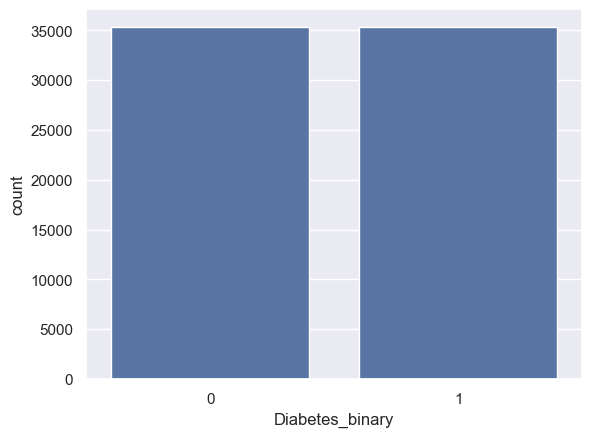

In [350]:
plot_frequency("Diabetes_binary")

### HighBP

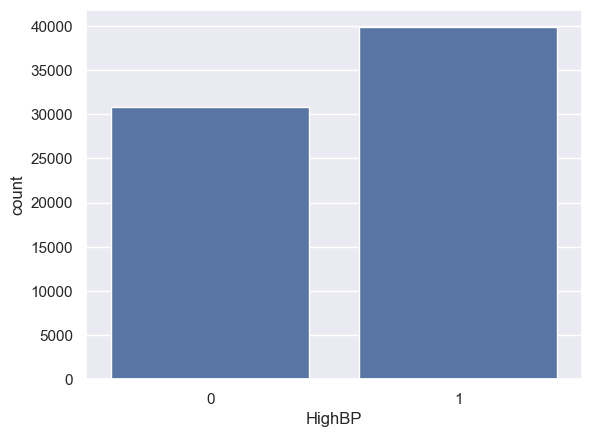

In [351]:
plot_frequency("HighBP")

### HighChol

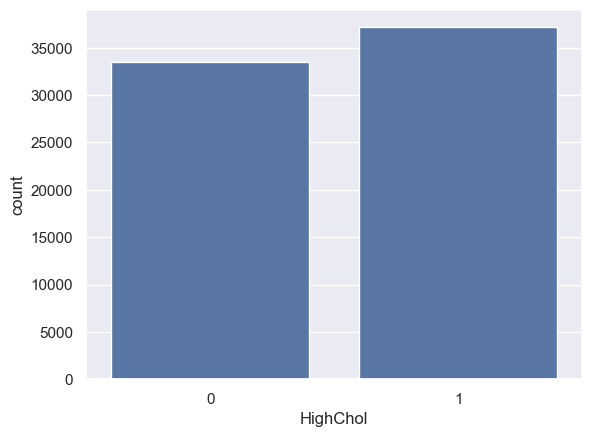

In [355]:
plot_frequency("HighChol")

### CholCheck

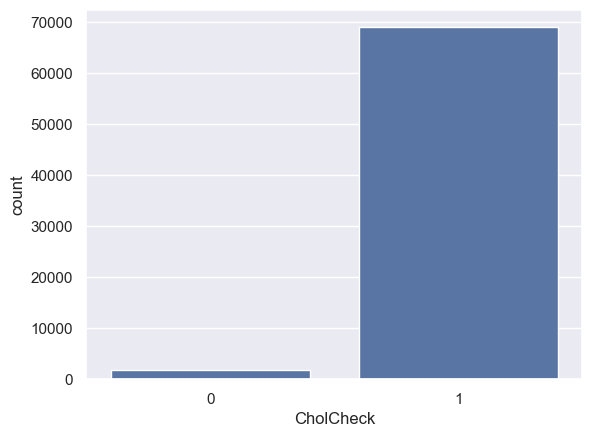

In [357]:
plot_frequency("CholCheck")

### BMI

<Axes: xlabel='BMI', ylabel='Count'>

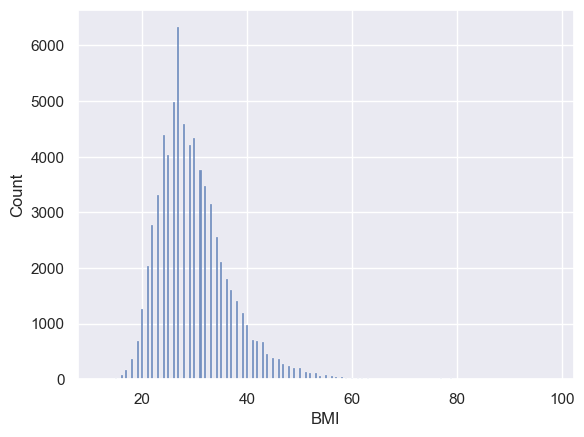

In [359]:
sns.histplot(data=df, x="BMI")

<Axes: xlabel='BMI'>

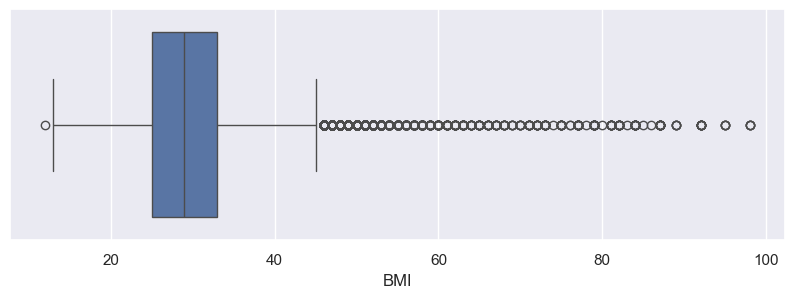

In [358]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x="BMI")

### Smoker

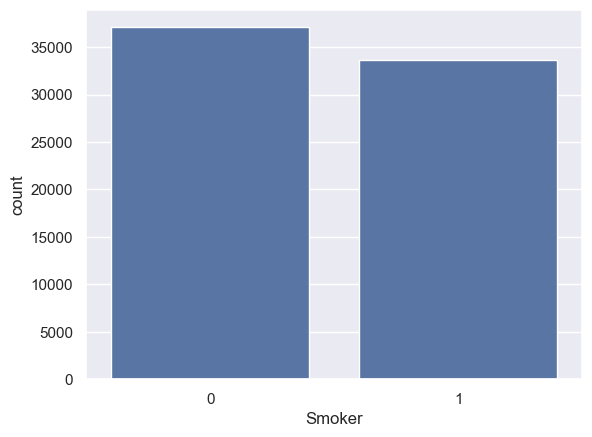

In [360]:
plot_frequency("Smoker")

### Stroke

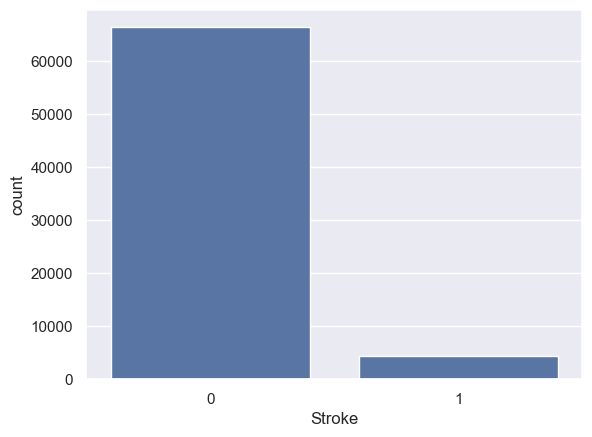

In [363]:
plot_frequency("Stroke")

### HeartDiseaseorAttack

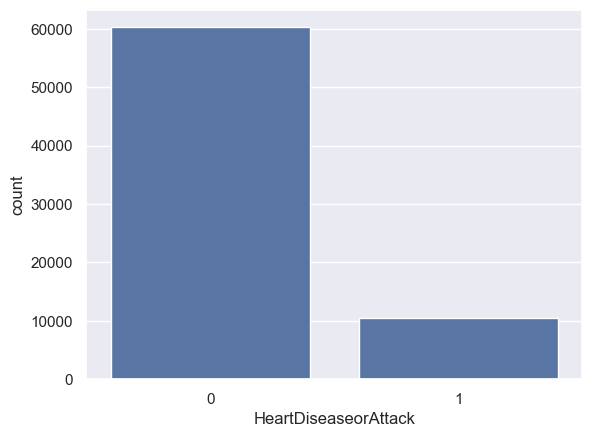

In [365]:
plot_frequency("HeartDiseaseorAttack")

### PhysActivity

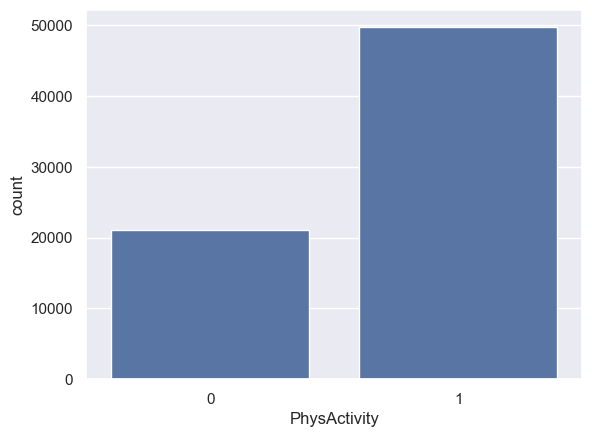

In [366]:
plot_frequency("PhysActivity")

### Fruits

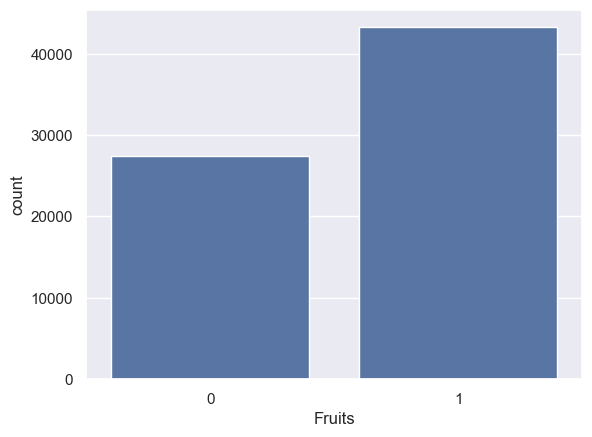

In [369]:
plot_frequency("Fruits")

### Veggies

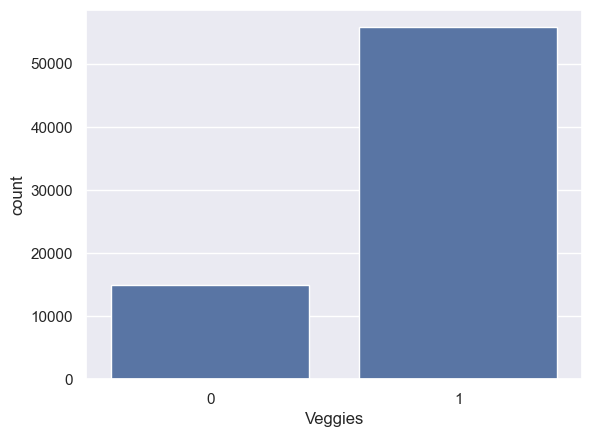

In [371]:
plot_frequency("Veggies")

### HvyAlcoholConsump

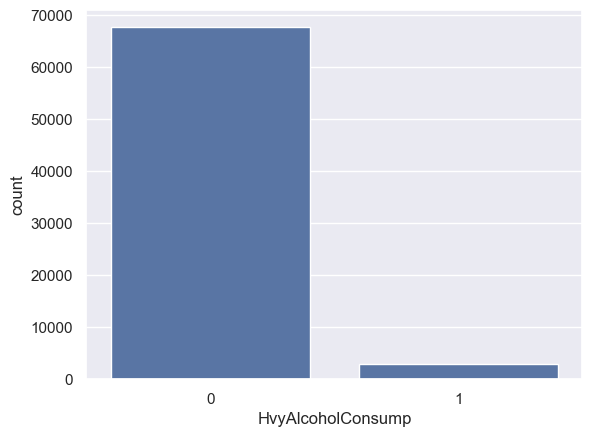

In [373]:
plot_frequency("HvyAlcoholConsump")

### AnyHealthcare

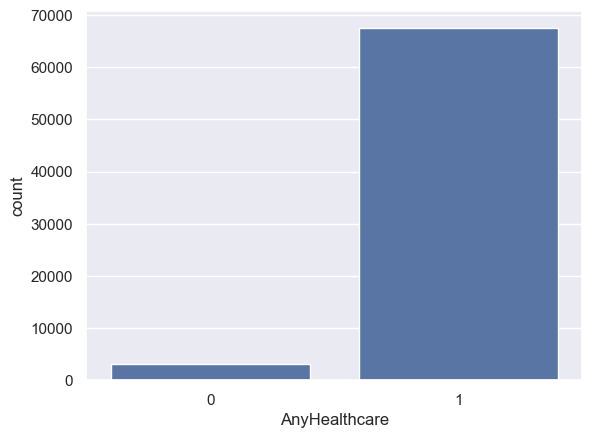

In [375]:
plot_frequency("AnyHealthcare")

### NoDocbcCost

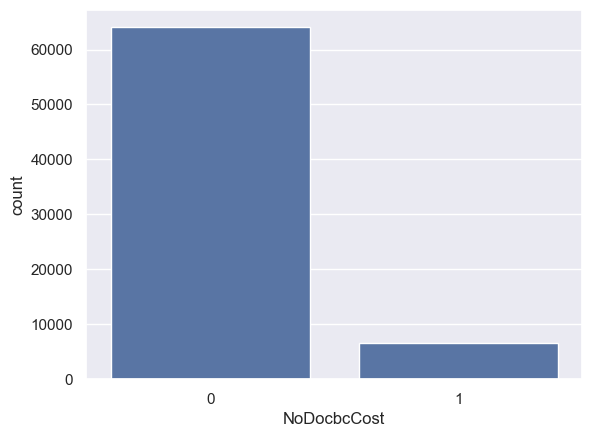

In [377]:
plot_frequency("NoDocbcCost")

### GenHlth

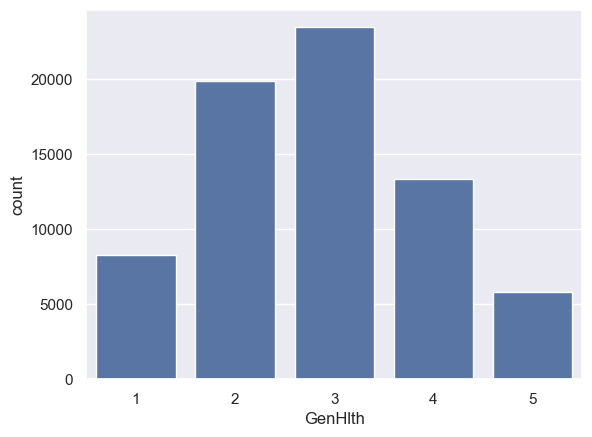

In [379]:
plot_frequency("GenHlth")

### MentHlth

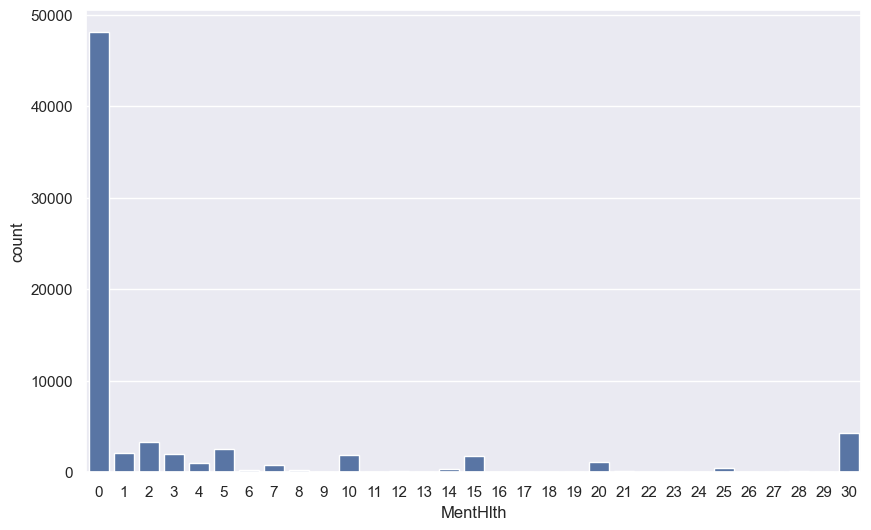

In [380]:
plt.figure(figsize=(10, 6))
plot_frequency("MentHlth") # Too sparse and right skew, needs binning

<Axes: xlabel='MentHlth'>

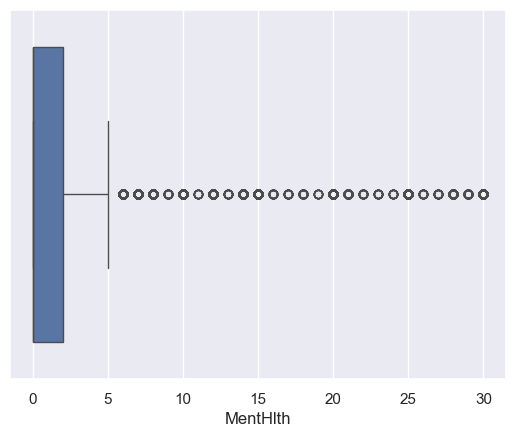

In [393]:
sns.boxplot(data=df, x="MentHlth")

### PhysHlth

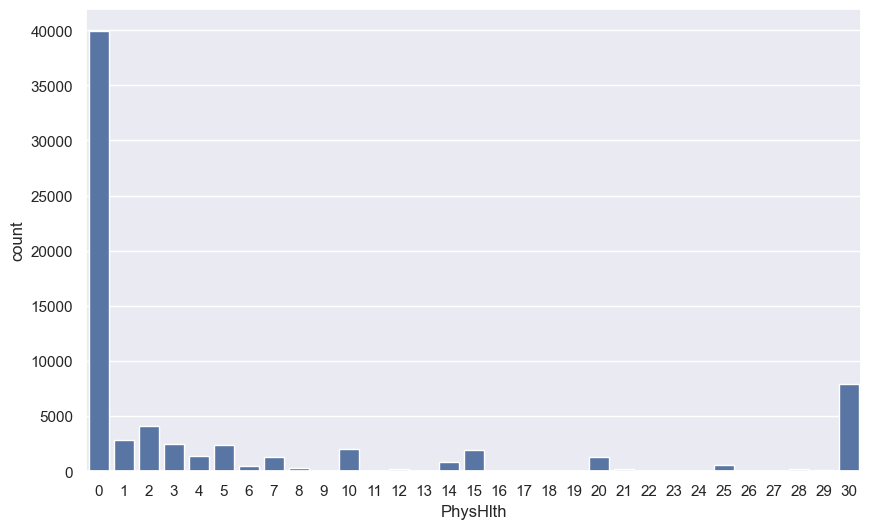

In [381]:
plt.figure(figsize=(10, 6))
plot_frequency("PhysHlth") # Needs binning since too sparse and too right skewed

<Axes: xlabel='PhysHlth'>

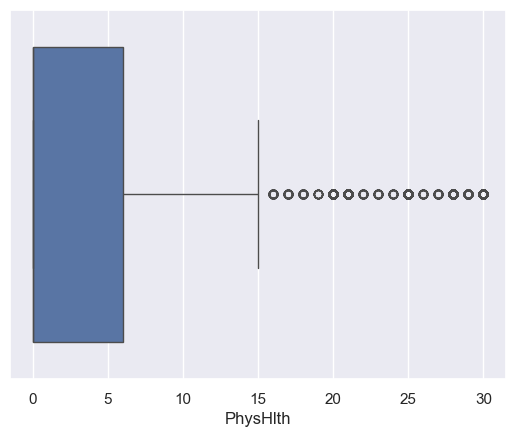

In [394]:
sns.boxplot(data=df, x="PhysHlth")

### DiffWalk

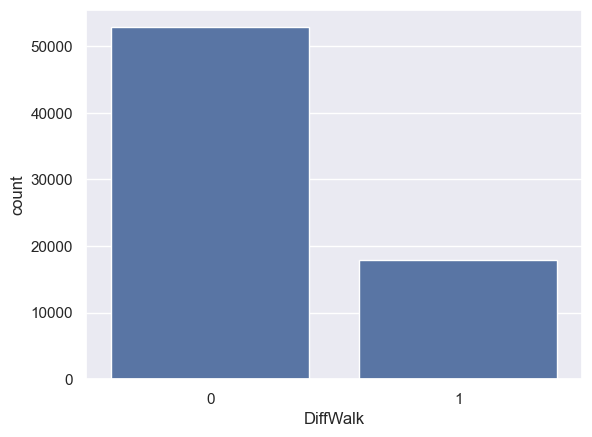

In [383]:
plot_frequency("DiffWalk")

### Sex

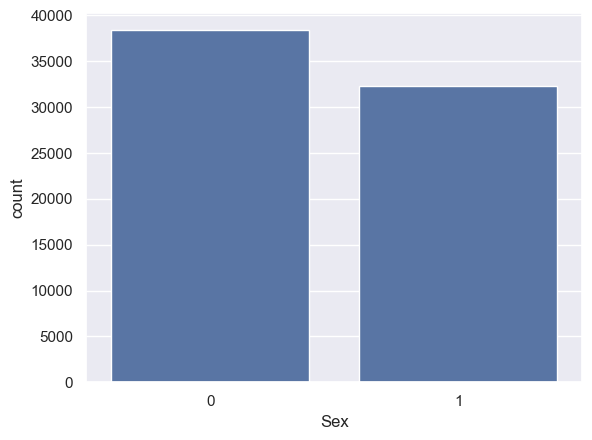

In [385]:
plot_frequency("Sex")

### Age

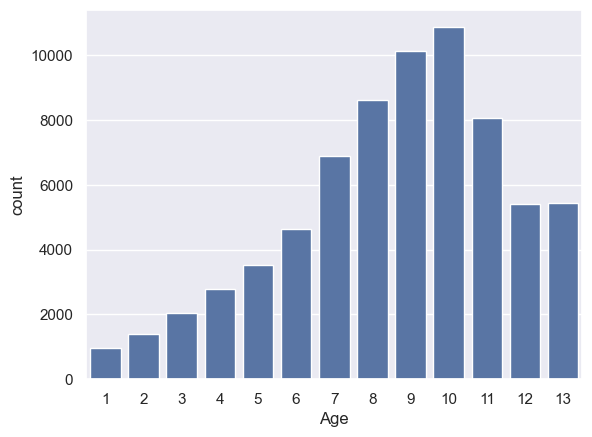

In [387]:
plot_frequency("Age")

### Education

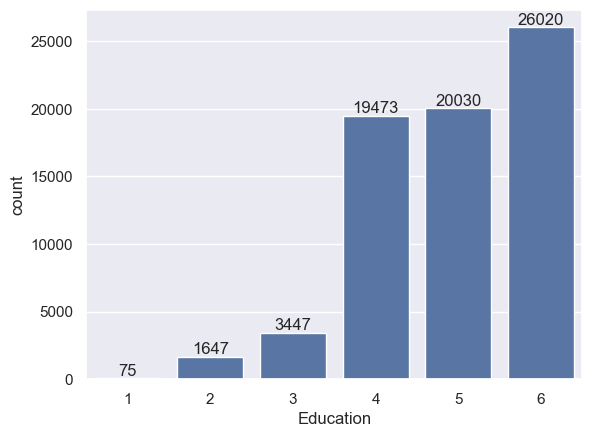

In [388]:
ax = sns.countplot(data=df, x="Education")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Income

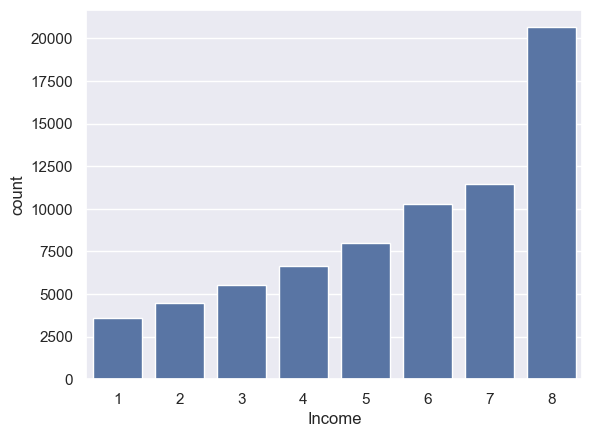

In [391]:
plot_frequency("Income")

### PhysHlth_Bin

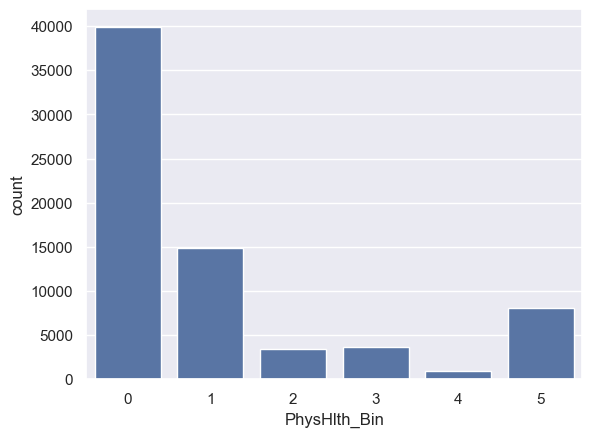

In [476]:
plot_frequency("PhysHlth_Bin")

### MentHlth_Bin

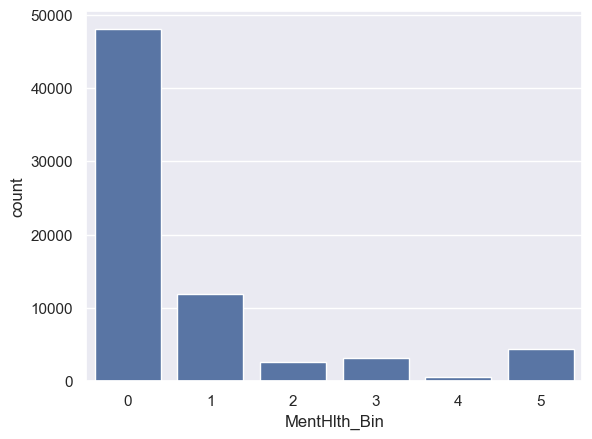

In [477]:
plot_frequency("MentHlth_Bin")

## Bivariate Analysis

Potential features after screening:
+ HighBP 
+ HighChol 
+ BMI
+ HeartDieasesorAttack 
+ GenHlth 
+ DiffWalk 
+ Age 
+ Income 
+ PhysHlth_Bin


Needs processing:
+ PhysHlth (Bin) and can't be used for Logistic Regression
+ MentHlth (Bin) and can't be used for Logistic Regression

In [352]:
def bivariate_analysis(col_name: str, y="Diabetes_binary"):
    if col_name not in df.columns:
        raise Exception("Column does not exist")
    else:
        sns.barplot(data=df, x=col_name, y=y, estimator="mean", errorbar=None)

### HighBP

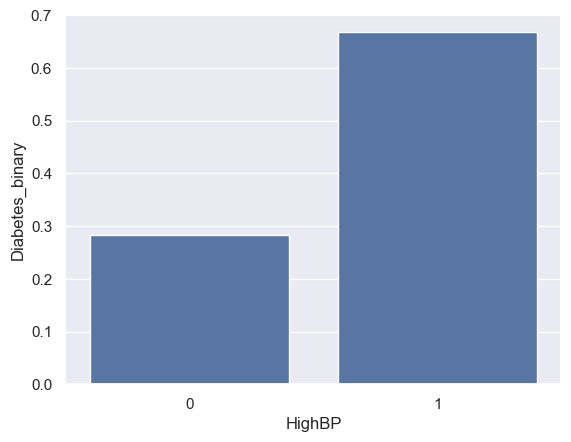

In [353]:
bivariate_analysis("HighBP")

### HighChol

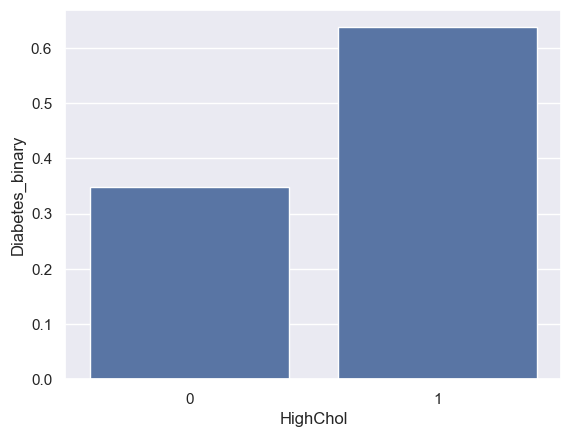

In [354]:
bivariate_analysis("HighChol")

### CholCheck

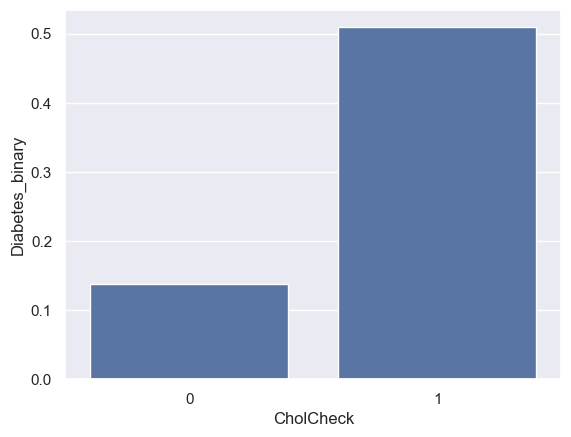

In [356]:
bivariate_analysis("CholCheck")

### BMI

<Axes: xlabel='Value_sqrt', ylabel='Logit'>

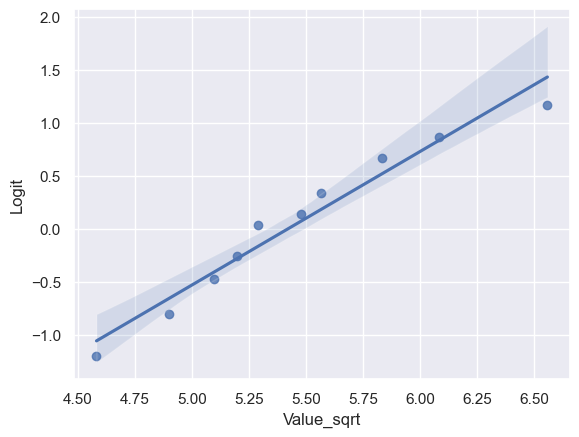

In [406]:
temp = df.copy()
temp["BMI_sqrt"] = temp["BMI"].apply(np.sqrt)

deciles = [round(0.1 * i, 1) for i in range(0, 11)]
logit_result = []

for i in range(10):
    lower = temp["BMI_sqrt"].quantile(deciles[i])
    upper = temp["BMI_sqrt"].quantile(deciles[i+1])
    if i == 0:
        decile = temp.loc[(temp["BMI_sqrt"] >= lower) & (temp["BMI_sqrt"] <= upper)]
    else:
        decile = temp.loc[(temp["BMI_sqrt"] > lower) & (temp["BMI_sqrt"] <= upper)]
    p = decile["Diabetes_binary"].mean()
    logit = np.log((p + 0.5/len(decile)) / (1 - p + 0.5/len(decile)))
    logit_result.append([decile["BMI_sqrt"].median(), logit])

logit_result = pd.DataFrame(data=logit_result, columns=["Value_sqrt", "Logit"])
sns.regplot(data=logit_result, x="Value_sqrt", y="Logit")

<Axes: xlabel='BMI_sqrt', ylabel='Diabetes_binary'>

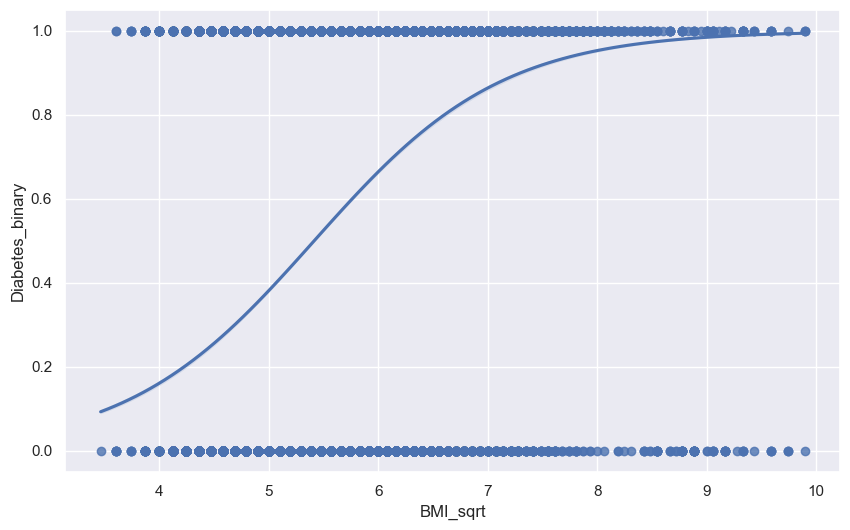

In [400]:
plt.figure(figsize=(10, 6))
sns.regplot(data=temp, x="BMI_sqrt", y="Diabetes_binary", logistic=True)

### Smoker

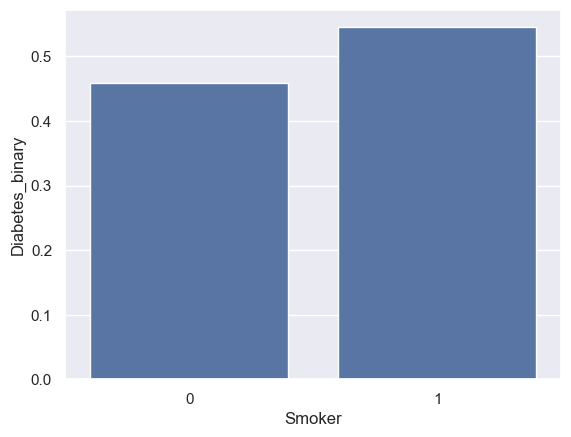

In [361]:
bivariate_analysis("Smoker")

### Stroke

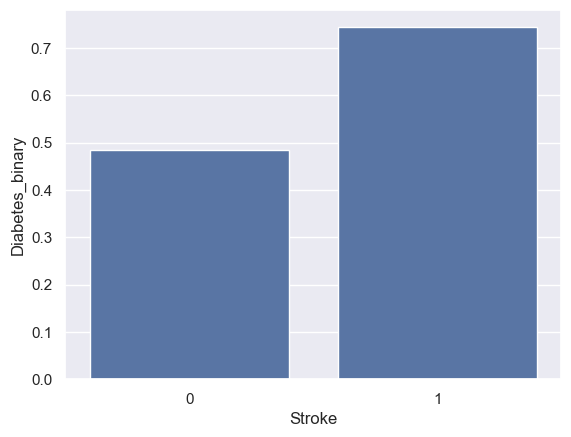

In [362]:
bivariate_analysis("Stroke")

### HeartDiseaseorAttack

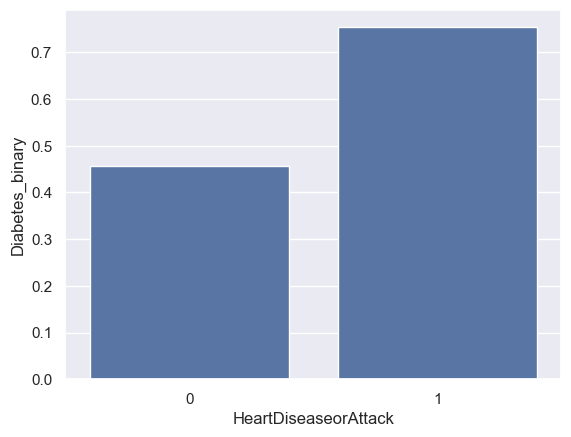

In [364]:
bivariate_analysis("HeartDiseaseorAttack")

### PhysActivity

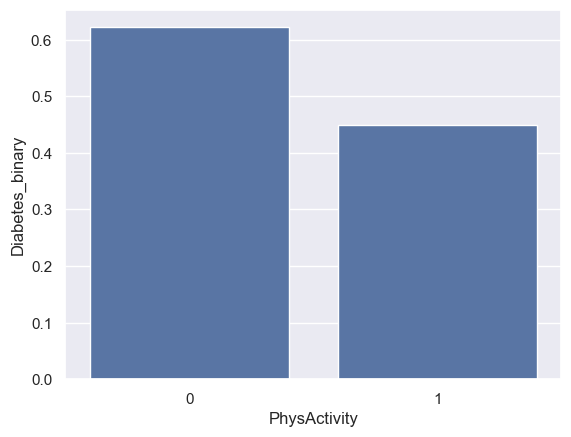

In [367]:
bivariate_analysis("PhysActivity")

### Fruits

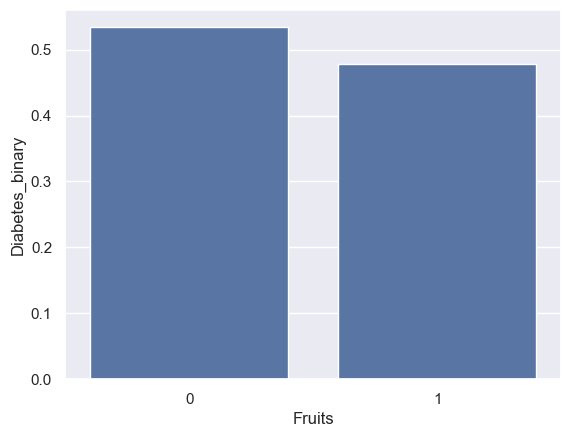

In [368]:
bivariate_analysis("Fruits")

### Veggies

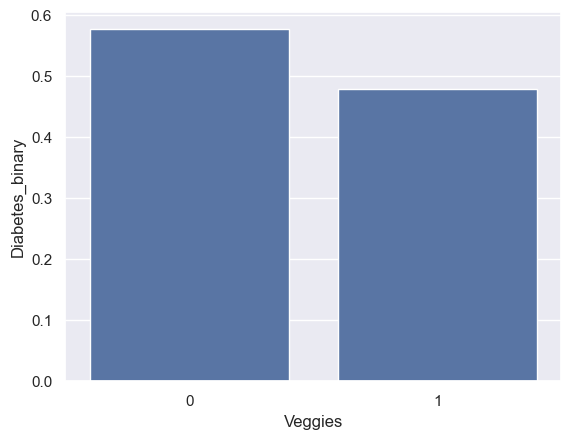

In [370]:
bivariate_analysis("Veggies")

### HvyAlcoholConsump

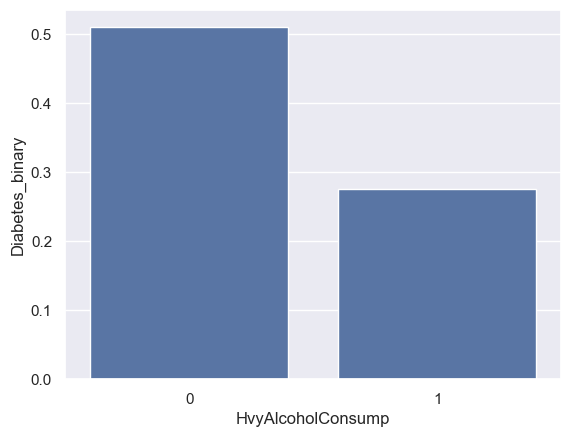

In [372]:
bivariate_analysis("HvyAlcoholConsump")

### AnyHealthcare

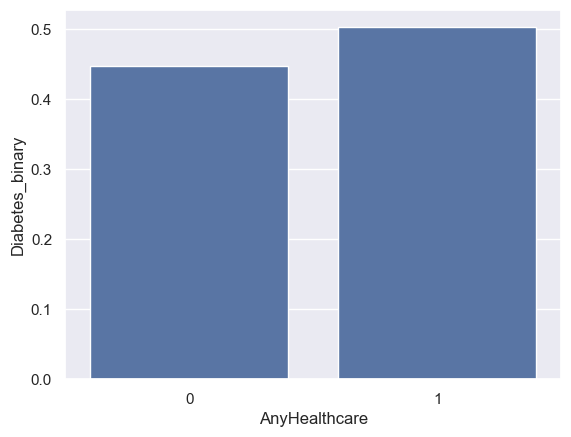

In [374]:
bivariate_analysis("AnyHealthcare")

### NoDocbcCost	

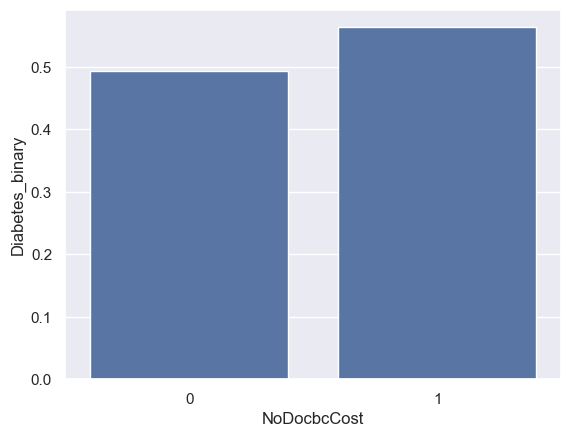

In [376]:
bivariate_analysis("NoDocbcCost")

### GenHlth

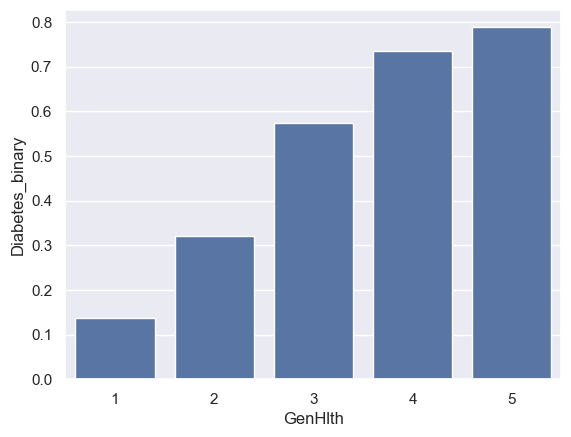

In [378]:
bivariate_analysis("GenHlth")

### MentHlth

<Axes: xlabel='MentHlth', ylabel='Diabetes_binary'>

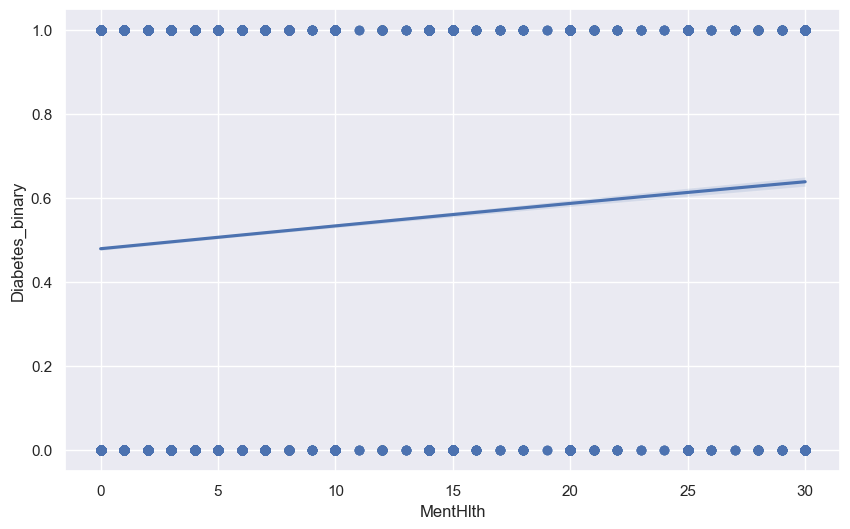

In [421]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="MentHlth", y="Diabetes_binary", logistic=True)

### PhysHlth

<Axes: xlabel='PhysHlth', ylabel='Diabetes_binary'>

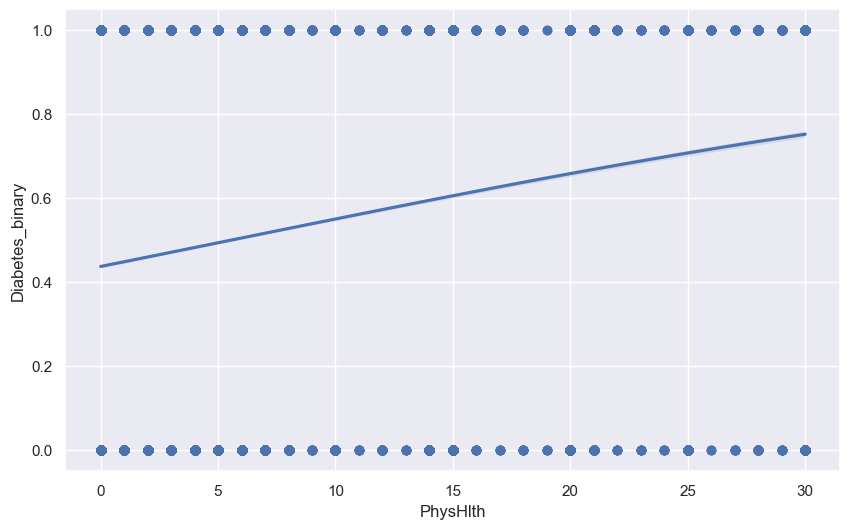

In [422]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x="PhysHlth", y="Diabetes_binary", logistic=True)

### DiffWalk

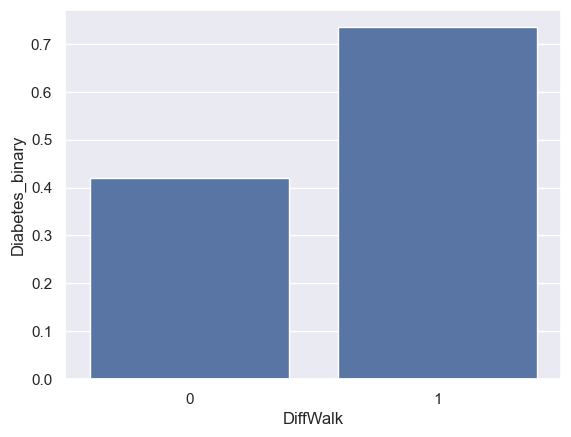

In [382]:
bivariate_analysis("DiffWalk")

### Sex

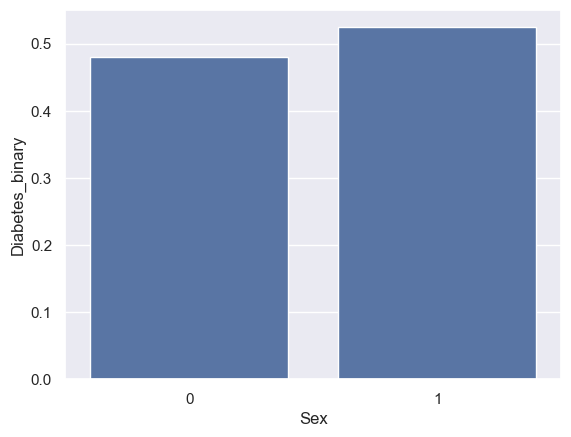

In [384]:
bivariate_analysis("Sex")

###	Age

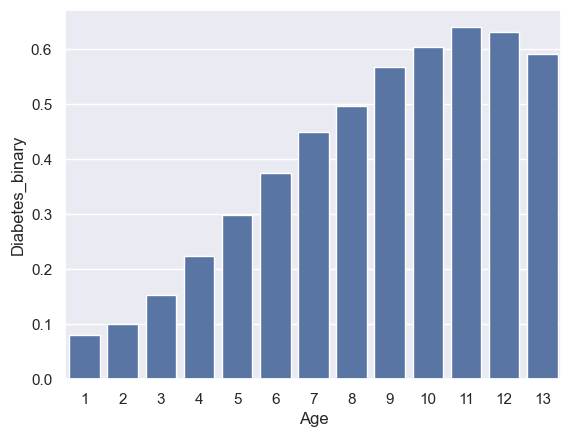

In [386]:
bivariate_analysis("Age")

### Education

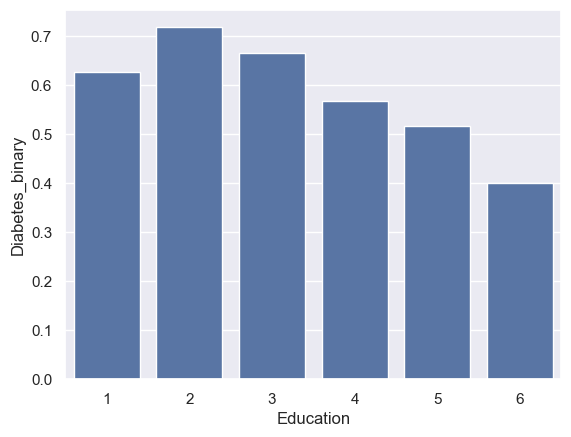

In [389]:
bivariate_analysis("Education")

### Income

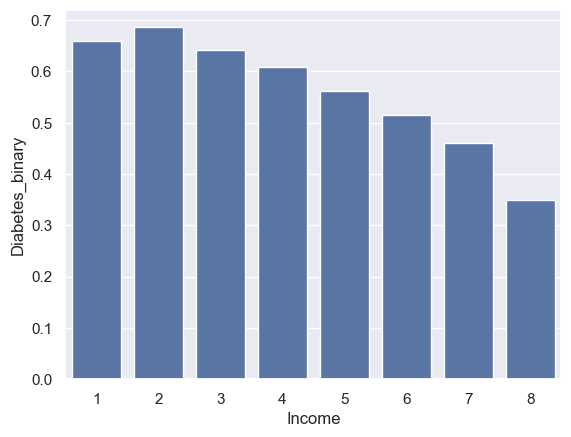

In [390]:
bivariate_analysis("Income")

### PhysHlth_Bin

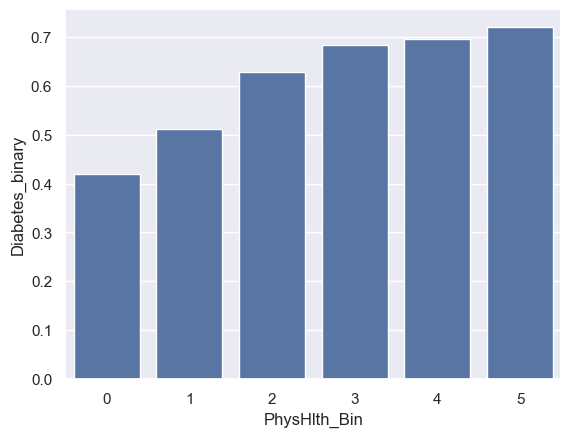

In [478]:
bivariate_analysis("PhysHlth_Bin")

### MentHlth_Bin

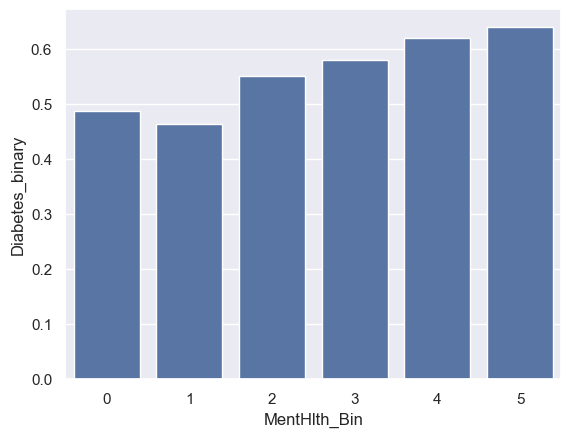

In [479]:
bivariate_analysis("MentHlth_Bin")

### Dependency test

In [452]:
def crammers_V(cross_tab: pd.DataFrame, chi2: float):
    min_dim = min(cross_tab.shape) - 1
    no_obs = cross_tab.sum().sum()
    result = np.sqrt(chi2 / (min_dim * no_obs))
    return result

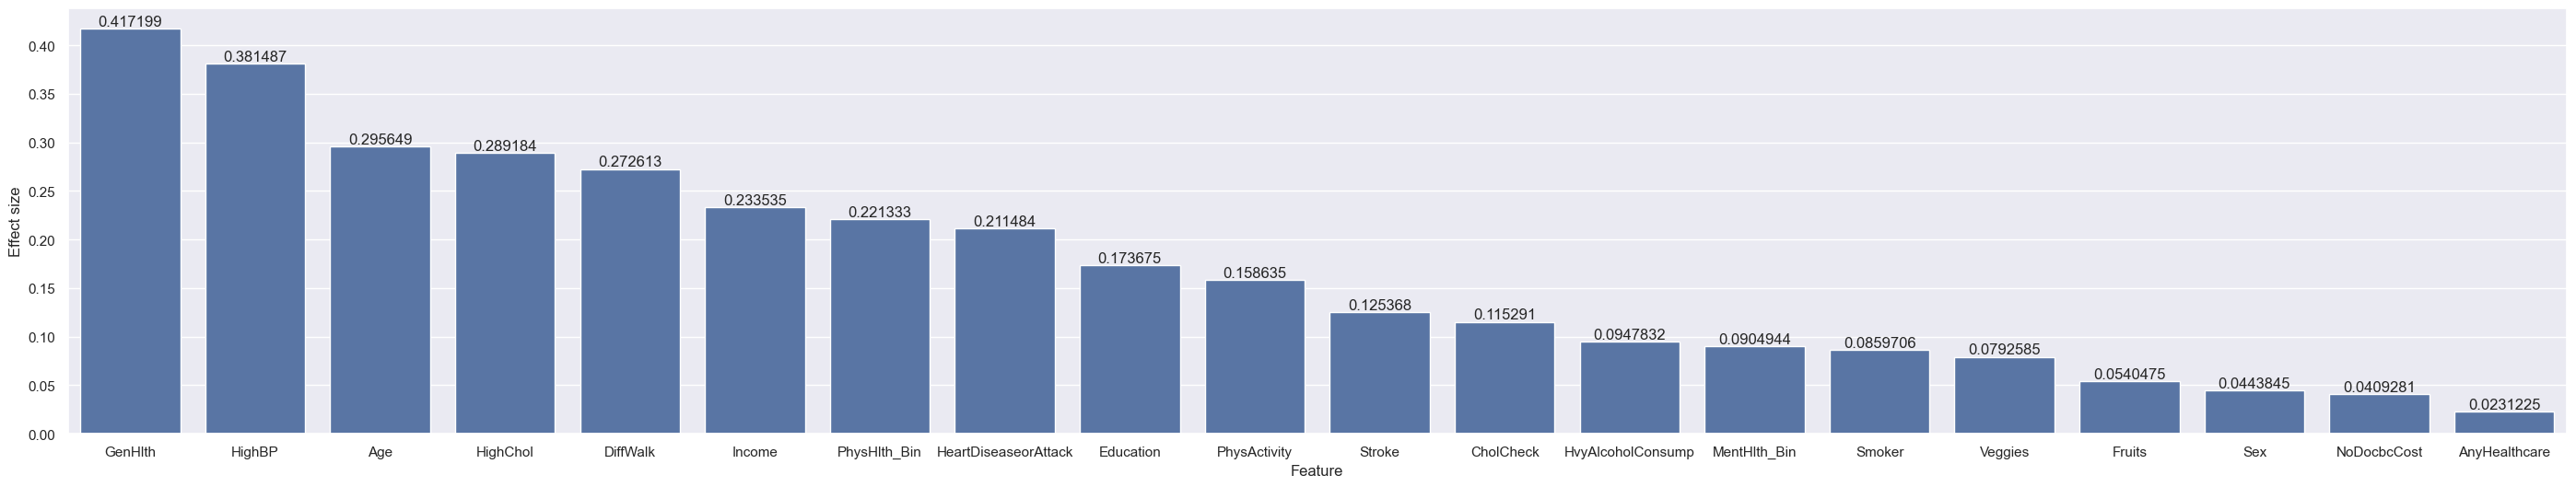

In [475]:
input_cat_features = df.columns.drop(["Diabetes_binary", "BMI", "PhysHlth", "MentHlth"])
dependency = []

for feature in input_cat_features:
    ct = pd.crosstab(df[feature], df["Diabetes_binary"])
    chi2, p, dof, expected = chi2_contingency(ct)
    if (p < 0.05):
        v = crammers_V(ct, chi2)
        dependency.append([feature, v])

dependency = pd.DataFrame(data=dependency, columns=["Feature", "Effect size"])
dependency.sort_values(by=["Effect size"], inplace=True, ascending=False)
plt.figure(figsize=(35, 6))
ax = sns.barplot(data=dependency, x="Feature", y="Effect size")

for container in ax.containers:
    ax.bar_label(container)
plt.show()